<a href="https://colab.research.google.com/github/zainbasit/Colab/blob/main/BuildingBrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

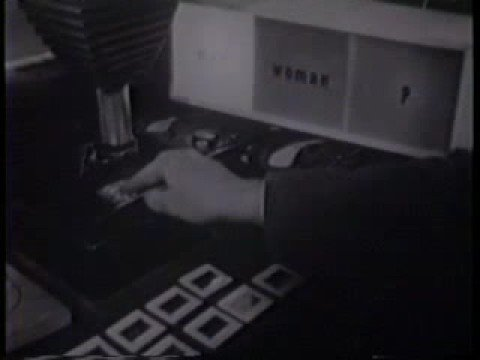

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('cNxadbrN_aI')

In [5]:
import tensorflow as tf

tf.config.list_physical_devices('GPU')

[]

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (valid_images, valid_labels) = fashion_mnist.load_data()

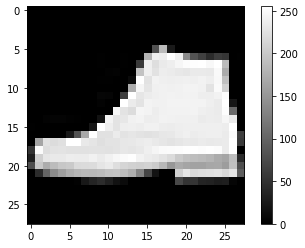

In [7]:
import matplotlib.pyplot as plt

# The question number to study with. Feel free to change up to 59999.
data_idx = 42

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
train_labels[data_idx]

9

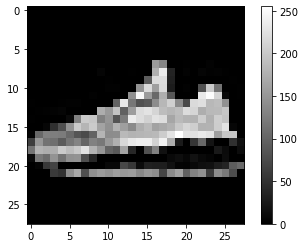

In [9]:
import matplotlib.pyplot as plt

# The question number to quiz with. Feel free to change up to 9999.
data_idx = 6174

plt.figure()
plt.imshow(valid_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
valid_labels[data_idx]

7

In [11]:
# 28 lists with 28 values each
valid_images[data_idx]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [12]:
number_of_classes = train_labels.max() + 1
number_of_classes

10

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(number_of_classes)
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [15]:
image_height = 28
image_width = 28

number_of_weights = image_height * image_width * number_of_classes
number_of_weights

7840

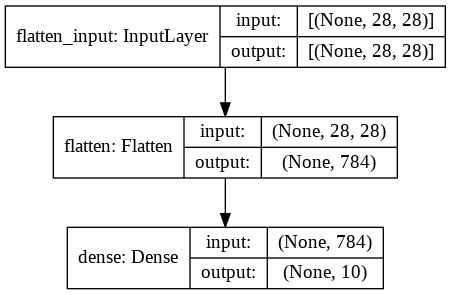

In [16]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
history = model.fit(
    train_images,
    train_labels,
    epochs=5,
    verbose=True,
    validation_data=(valid_images, valid_labels)
)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 16.4181 - accuracy: 0.7470 - val_loss: 15.2821 - val_accuracy: 0.7433
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 11.9452 - accuracy: 0.7887 - val_loss: 10.0800 - val_accuracy: 0.7997
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 10.9985 - accuracy: 0.7950 - val_loss: 11.7309 - val_accuracy: 0.8030
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 10.8228 - accuracy: 0.7982 - val_loss: 11.8753 - val_accuracy: 0.7781
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 10.2353 - accuracy: 0.8027 - val_loss: 17.3724 - val_accuracy: 0.7813


In [19]:
model.predict(train_images[0:10])

array([[-4.3993584e+01, -4.1888864e+02, -2.8368946e+01,  2.8350119e+01,
        -1.6417781e+02,  5.2487054e+02,  3.0308584e+01,  4.0989926e+02,
         1.9050478e+02,  7.3425531e+02],
       [ 4.1475366e+02, -2.1422847e+02,  2.4182571e+02,  2.6424338e+02,
        -1.0549384e+02, -1.2597985e+03,  1.2426423e+02, -2.0169689e+03,
        -1.6255457e+02, -6.9333173e+02],
       [ 1.4261322e+02,  7.5852600e+01,  5.9181969e+01,  1.1202949e+02,
         6.3872974e+01, -4.6310110e+02,  5.1537743e+01, -5.0773663e+02,
        -8.2786354e+01, -2.1109116e+02],
       [ 2.2592834e+02,  1.0161679e+02,  1.4993129e+02,  1.9515926e+02,
         7.6355881e+01, -6.9262457e+02,  1.1176234e+02, -1.0402439e+03,
        -1.4201651e+02, -5.7482440e+02],
       [ 2.3407184e+02,  2.6112097e+02,  7.9902733e+01,  2.2477042e+02,
         9.1753250e+01, -8.7794366e+02,  2.4063843e+01, -9.2581683e+02,
        -3.3206390e+01, -7.9330219e+02],
       [ 2.2354718e+02, -1.8241070e+01,  3.6251151e+02,  1.7287566e+02,
   

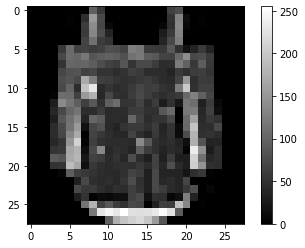

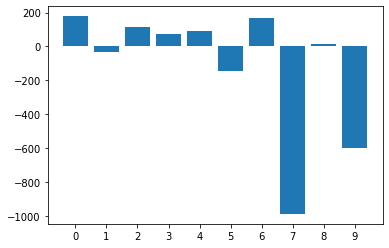

correct answer: 6


In [20]:
data_idx = 8675 # The question number to study with. Feel free to change up to 59999.

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

x_values = range(number_of_classes)
plt.figure()
plt.bar(x_values, model.predict(train_images[data_idx:data_idx+1]).flatten())
plt.xticks(range(10))
plt.show()

print("correct answer:", train_labels[data_idx])